In [103]:
import csv
import pprint
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re
from collections import OrderedDict, defaultdict
from math import sin, asin, cos, radians, fabs, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [104]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          10635 non-null  object 
 1   summary                                       10635 non-null  object 
 2   space                                         7793 non-null   object 
 3   description                                   10635 non-null  object 
 4   experiences_offered                           10635 non-null  object 
 5   neighborhood_overview                         6973 non-null   object 
 6   notes                                         4462 non-null   object 
 7   transit                                       7096 non-null   object 
 8   access                                        6079 non-null   object 
 9   interaction                                   6561 non-null  

# Data overview

In [73]:
# !pip install dabl

In [74]:

from dabl import detect_types
types=detect_types(train_data)
types

C:\Users\Alex\anaconda3\lib\site-packages\dabl\preprocessing.py:351: UserWarning: Discarding near-constant features: ['experiences_offered', 'bed_type', 'requires_license', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count_shared_rooms']
  warn("Discarding near-constant features: {}".format(


,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
name,False,False,False,False,False,True,False
summary,False,False,False,False,False,True,False
space,False,False,False,False,False,True,False
description,False,False,False,False,False,True,False
experiences_offered,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
calculated_host_listings_count_entire_homes,False,False,True,False,False,False,False
calculated_host_listings_count_private_rooms,False,False,True,False,False,False,False
calculated_host_listings_count_shared_rooms,False,False,False,False,False,False,True
reviews_per_month,True,False,False,False,False,False,False


In [75]:
types[types['useless']==True]

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
experiences_offered,False,False,False,False,False,False,True
bed_type,False,False,False,False,False,False,True
requires_license,False,False,False,False,False,False,True
is_business_travel_ready,False,False,False,False,False,False,True
require_guest_profile_picture,False,False,False,False,False,False,True
require_guest_phone_verification,False,False,False,False,False,False,True
calculated_host_listings_count_shared_rooms,False,False,False,False,False,False,True


In [76]:
types[types['dirty_float']==True]

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
zipcode,False,True,False,False,False,False,False


# Apply Profile report to view variables details

In [77]:
from pandas_profiling import ProfileReport
profile_train=ProfileReport(train_data)
profile_train

In [78]:
# !pip install mssingno

# Check missing value

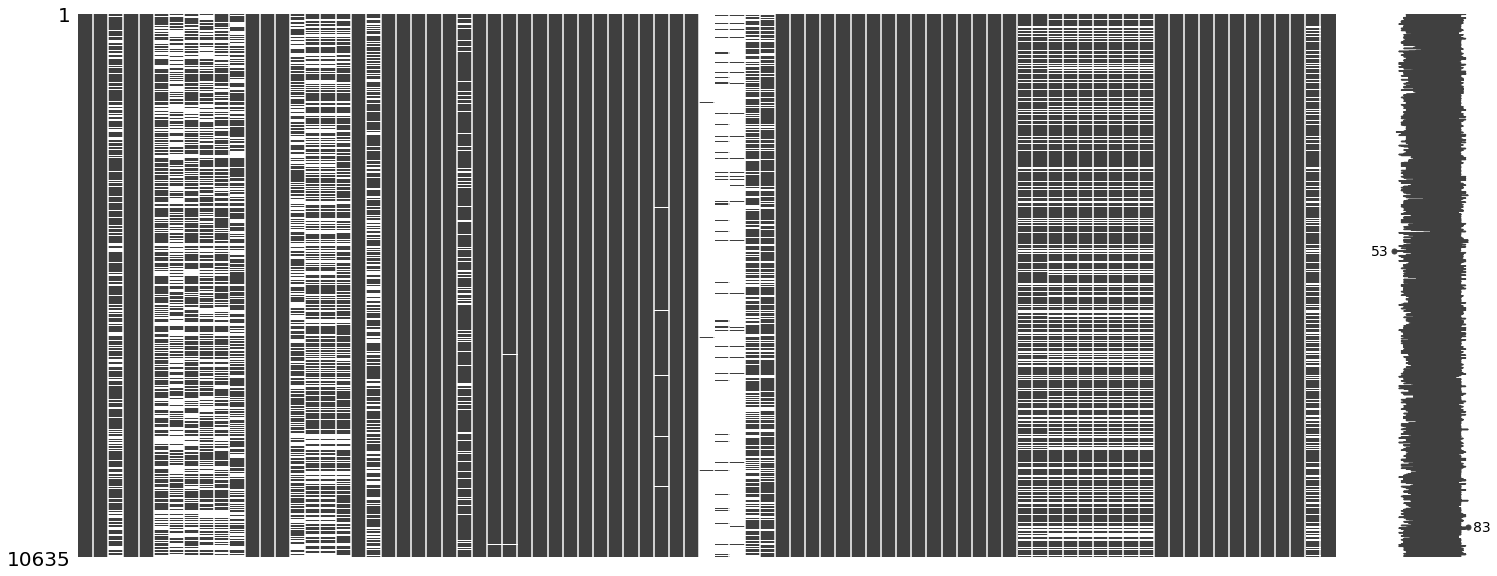

In [79]:
import missingno as msno
msno.matrix(train_data)
plt.show()

# Some useful functions 

In [82]:
#analyzsis data  
def analyser(column_name,dtype = 'cate',show = False,eda = False):
    if dtype == 'cate':
        if eda == False:
            df1 = pd.crosstab(index = train_data[column_name],columns='train_data')
            df2 = pd.crosstab(index = test_data[column_name],columns='test_data')
            if show == True:
                sns.boxplot(x=column_name,y = 'price',data = train_data,palette = 'Blues')
                plt.tight_layout()
                plt.show()
                
                for i in train_data[column_name].unique():
                    sns.distplot(train_data.loc[train_data[column_name] == i,'price'],hist = False,label = i)
                    
            return pd.concat([df1,df2],axis = 1)
        if eda == True:
            if show == True:
                sns.boxplot(x=column_name,y = 'price',data = train_data,palette = 'Blues')
                plt.tight_layout()
                plt.show()
                
                for i in train_data[column_name].unique():
                    sns.distplot(train_data.loc[train_data[column_name] == i,'price'],hist = False,label = i)
                    
            return train_data.groupby(column_name)['price'].describe().round(2)
        
    elif dtype == 'num':
        df1 = pd.DataFrame(train_data[column_name].describe()).rename(columns = {column_name:'train_data'})
        df2 = pd.DataFrame(test_data[column_name].describe()).rename(columns = {column_name:'test_data'})
        if show == True:
            sns.distplot(train_data[column_name],hist = False)
            plt.title('train_data')
            sns.despine()
            plt.show()
        return pd.concat([df1,df2],axis = 1)       

In [105]:
from math import sin, asin, cos, radians, fabs, sqrt

EARTH_RADIUS = 6371  # radius of the earth 

def hav(theta):
    s = sin(theta / 2)
    return s * s

#convert lat and longt to distance
def get_distance_hav(lat0, lng0, lat1, lng1):

    
    lat0 = radians(lat0)
    lat1 = radians(lat1)
    lng0 = radians(lng0)
    lng1 = radians(lng1)

    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))

    return round(distance,2)


# NLKT processing

In [106]:
from langdetect import detect
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [107]:
train_data['language'] = train_data['neighborhood_overview'].apply(language_detection)
test_data['language'] = test_data['neighborhood_overview'].apply(language_detection)

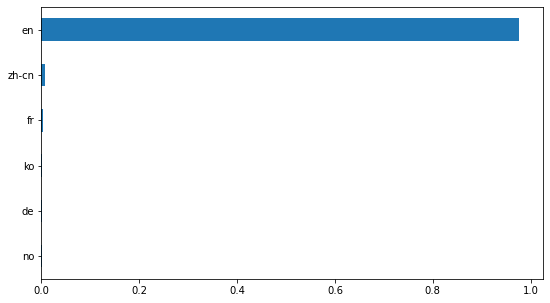

In [108]:
# visualizing the overview' languages a) quick and dirty
ax = train_data.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5))

In [112]:
train_data_eng = train_data[(train_data['language']=='en')]
test_data_eng = test_data[(test_data['language']=='en')]

In [113]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [114]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

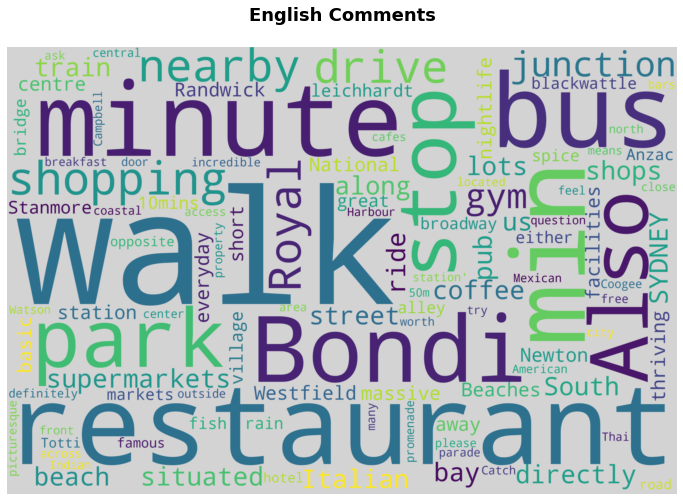

In [115]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(train_data_eng.neighborhood_overview.values))

plot_wordcloud(wordcloud, 'English')

In [119]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [120]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [121]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [123]:
# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

In [124]:
for i in range(train_data.language.shape[0]):
    if train_data.language[i]=='en':
        train_data.neighborhood_overview [i]= positive_score(train_data.neighborhood_overview[i])
    else:
        train_data.neighborhood_overview [i]=0

<ipython-input-124-ebbea187b43e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.neighborhood_overview [i]= positive_score(train_data.neighborhood_overview[i])
<ipython-input-124-ebbea187b43e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.neighborhood_overview [i]=0


In [125]:
for i in range(test_data.language.shape[0]):
    if test_data.language[i]=='en':
        test_data.neighborhood_overview [i]= positive_score(test_data.neighborhood_overview[i])
    else:
        test_data.neighborhood_overview [i]=0

<ipython-input-125-482ce52e62b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.neighborhood_overview [i]= positive_score(test_data.neighborhood_overview[i])
<ipython-input-125-482ce52e62b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.neighborhood_overview [i]=0


In [131]:
train_data['neighborhood_overview']=train_data['neighborhood_overview'].fillna(0)
test_data['neighborhood_overview']=test_data['neighborhood_overview'].fillna(0)

# Amenities one-hot encoding

In [128]:
all_amenities = \
set(['24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'])

In [129]:
for item in all_amenities:
    colname = "has_" + item.replace(" ", "_")
    train_data[colname] = train_data['amenities'].apply(lambda x: int(item in x))

In [130]:
for item in all_amenities:
    colname = "has_" + item.replace(" ", "_")
    test_data[colname] = test_data['amenities'].apply(lambda x: int(item in x))

# Keyword seaching and encoding

In [132]:
#convert text to number according to good keywards list 
def good_des(data):
    
    n_col=data['description']
    data.insert(loc=len(data.columns), column='cleaned_description', value=n_col)
    data['cleaned_description']=data['cleaned_description'].fillna("X")
    count_new_train=[]
    #seaching good description by ordinal encording
    for i in data['cleaned_description']:
        result_train=re.findall( 'new|comfort|good|awesome|nice|enjoy|close|breakfast|free|brand|balcony',i)
        count_rev_train=len(result_train)
        count_new_train.append(count_rev_train)
    data['cleaned_description']=count_new_train
    
    #dummy encoidng to host_location
    host_local=[]
    data['host_location'].fillna("X")
    for j in data['host_location']:
        
        
        result1=re.findall('Australia|AU|Sydney|NSW|New Sales Wales', str(j))
        host_local_count=(len(result1)!=0)
        host_local.append(int(host_local_count))
        
    data['host_location']=host_local
 
    
   #dummy encoding to free access 
    access_train=[]
    data['access'].fillna("X")
    for k in data['access']:
        result2=re.findall('Full|full|Whole|whole|All|all|free', str(k))
        access_count=(len(result2)!=0)
        access_train.append(int(access_count))
    data['access']=access_train
    
    data.loc[ (data['cancellation_policy']=='super_strict_30') | (data['cancellation_policy']== 'luxury_super_strict_125' ) |(data['cancellation_policy']=='strict_14_with_grace_period')
            |(data['cancellation_policy']=='super_strict_60')| (data['cancellation_policy']=='luxury_no_refund'), 'cancellation_policy']='strict'
    data.loc[data['cancellation_policy']=='luxury_moderate', 'cancellation_policy']='moderate'
    
    return data





In [133]:
good_des(train_data)
good_des(test_data)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,has_Smoke_Detector,has_Hangers,has_Indoor_Fireplace,has_Gym,has_Suitable_for_Events,has_Carbon_Monoxide_Detector,has_Washer,has_Pool,has_Breakfast,cleaned_description
0,0,"Location, location, location?",The apartment is your home away from home with...,NaN,The apartment is your home away from home with...,none,0.347,NaN,"the buses at at your doorstep, 10 mins into th...",0,...,0,1,0,0,0,0,1,0,0,4
1,1,Close to village and 2 surf beaches!,This charming beach house has undergone an imm...,"Great flow throughout the house, excellent con...",This charming beach house has undergone an imm...,none,0.070,NaN,"Bus stops close by, city access.",0,...,0,1,0,0,0,0,1,0,0,1
2,2,Beautiful 2 bedroom house in fabulous Newtown,Our beautiful light-filled house is close to e...,"There are 2 bedrooms, one with a double bed an...",Our beautiful light-filled house is close to e...,none,0.194,"Maximum 4 adults, but families of 5 including ...","Our place is close to buses, trains and a 15 m...",0,...,0,1,0,0,0,0,1,0,0,4
3,3,"Check out our bright, happy home!",Hi! Totally looking forward to meeting you guy...,"We love our comfortable, quiet and quirky home...",Hi! Totally looking forward to meeting you guy...,none,0.185,Please note. Our apartment is on the third flo...,There is free parking for your vehicle on our ...,1,...,0,0,0,0,0,0,1,0,0,7
4,4,renovated terrace house - quiet street near CBD,A beautiful newly renovated house looking ont...,A beautiful newly renovated house looking ont...,A beautiful newly renovated house looking ont...,none,0.220,NaN,My house is in proximity to three railway sta...,1,...,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,24813,Open and Spacious Studio in Bellevue Hill,Spacious and Open Studio in Bellevue Hill Idea...,The Apartment is located up a flight of stairs...,Spacious and Open Studio in Bellevue Hill Idea...,none,0.181,NaN,NaN,0,...,0,1,0,0,0,0,0,0,0,3
24814,24814,Heart of Bondi Beach,Beautifully decorated and renovated 2 bedroom ...,"Learn to surf. Access to a 7""0 Softlite.",Beautifully decorated and renovated 2 bedroom ...,none,0.000,NaN,NaN,0,...,0,1,0,0,0,0,1,0,0,0
24815,24815,Surf Haven,Fancy swimming with reef sharks?! Surfing next...,"The apartment has old style charm, with pine (...",Fancy swimming with reef sharks?! Surfing next...,none,0.102,Please note that the security deposit is high ...,The apartment is a 5 minute walk to Manly Whar...,1,...,0,1,0,0,0,0,1,0,0,3
24816,24816,Summer at Bondi Beach,"Enjoy your summer at this beautiful apartment,...",NaN,"Enjoy your summer at this beautiful apartment,...",none,0.000,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,2


# Data preprocessing

In [134]:
def dataclean(data):
    #set defalut coordicate as surry hill (latitude & longtitude )
    surry_hill=[-33.7022,150.5500]
    dist=[]
    lat=data['latitude']
    long=data['longitude']
    # processing data from left to right
#     data.drop(data.columns[0:11],axis=1,inplace=True)
    data.drop('zipcode',axis=1,inplace=True)
    
    #fill nan to 0
    data['host_response_time'].fillna('no record',inplace=True)
    data['reviews_per_month'].fillna(0,inplace=True)
    data['host_neighbourhood'].fillna('no record',inplace=True)
    data.drop(['square_feet'],axis=1,inplace=True)
    data['weekly_discount'].fillna(0,inplace=True)
    data['monthly_discount'].fillna(0,inplace=True)
    data['security_deposit_perc'].fillna(0,inplace=True)
    data['cleaning_fee_perc'].fillna(0,inplace=True)
    
    
    data['notes']=data['notes'].isnull().astype(int)
    data['interaction']=data['interaction'].isnull().astype(int)
#     data['access']=data['access'].isnull().astype(int)
#     data['host_about']=data['host_about'].isnull().astype(int)
#     data['space']=data['space'].isnull().astype(int)
    
    
    #fill time
    data['first_review']=pd.to_datetime(data['first_review'])
    data['last_review']=pd.to_datetime(data['last_review'])
    new_column_date=data['last_review']-data['first_review']
    data.insert(loc=len(data.columns), column='period_review', value=new_column_date)
    data['period_review'].dt.days
    data.drop(['first_review','last_review'],axis=1,inplace=True)
    data['period_review'].fillna((data['period_review']).mean(),inplace=True)
    
    #use training model to fill nan values ! probabbly cause multilinear 
    predictors=['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
    x_train=data.loc[:,predictors]
    imp=IterativeImputer()
    imp.fit(x_train)
    data[predictors]=imp.transform(data[predictors])
    
#     data['review_scores_rating'].fillna(data['review_scores_rating'].mean(),inplace=True)
#     names=['review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
    
#     for k in names:
#         data[k].fillna(data[k].mean(), inplace=True)
    

    
    #Hand encoding
    response_time={'within an hour':1,'within a few hours':2,'within a day':3,'a few days or more':4,'No response':5}
    new_column=data.host_response_time.map(response_time)
    data.insert(loc=len(data.columns), column='cleaned_response_time', value=new_column)
    data['cleaned_response_time'].fillna(5,inplace=True)
    
    
    
    #convert lat and longtitude to distance 
    for i in range(data.shape[0]):
        dist.append(get_distance_hav(lat[i],long[i],surry_hill[0],surry_hill[1]))
    data.insert(loc=len(data.columns), column='distance', value=dist)
    
    host_is_sh={'f':0,'t':1}
    new_column2=data.host_is_superhost.map(host_is_sh)
    data.insert(loc=len(data.columns), column='cleaned_host_is_superhost', value=new_column2)
    
    #deal with host_since date(latest date - current date)
    data.host_since=pd.to_datetime(data.host_since)
    data['host_since']=data.host_since.apply(lambda x : data['host_since'].max()-x).dt.days
    
    
    true_false={'f':0,'t':1}
    new_column3=data.requires_license.map(true_false)
    new_column4=data.instant_bookable.map(true_false)
    new_column5=data.is_business_travel_ready.map(true_false)
    new_column6=data.require_guest_profile_picture.map(true_false)
    new_column7=data.require_guest_phone_verification.map(true_false)
    
    data.drop(['summary','experiences_offered','city','smart_location','latitude','longitude','street','host_id','host_location','host_response_time','host_is_superhost','requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification'],axis=1,inplace=True)
    data.drop(['maximum_minimum_nights','minimum_nights','maximum_nights','maximum_maximum_nights','minimum_minimum_nights','availability_60','availability_90', 'host_listings_count' ,'calculated_host_listings_count_entire_homes'],axis=1,inplace=True)
#     room_type={'Private room':0, 'Entire home/apt':1, 'Shared room':2, 'Hotel room':3}
#     new_room_type=data.room_type.map(room_type)
#     data.insert(loc=len(data.columns), column='cleaned_room_type', value=new_room_type)
#     data.drop(['room_type'],axis=1)
    #encoding true and false
    
    true_false={'f':0,'t':1}
    new_column8=data.host_identity_verified.map(true_false)
    new_column9=data.is_location_exact.map(true_false)
    data.insert(loc=len(data.columns), column='cleaned_host_identity_verified', value=new_column8)
    data.insert(loc=len(data.columns), column='cleaned_is_location_exact', value=new_column9)
    
    data.drop(['host_identity_verified','is_location_exact'],axis=1,inplace=True)
    
    #['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
    bed_type={ 'Pull-out Sofa':1, 'Couch':2, 'Futon':3, 'Airbed':4,'Real Bed':5}
    new_bed_type=data.bed_type.map(bed_type)
    data.insert(loc=len(data.columns), column='cleaned_bed_type', value=new_bed_type)
    data.drop(['bed_type'],axis=1,inplace=True)
    
    
    #fill these nan with half of accomodation
    data['bathrooms'].fillna(0.33*data['accommodates'],inplace=True)
    data['bedrooms'].fillna(0.5*data['accommodates'],inplace=True)
    data['beds'].fillna(0.5*data['accommodates'],inplace=True)
    
    data['host_response_rate'] = data['host_response_rate'].str.strip('%').astype(float)/100
    data['host_acceptance_rate'] = data['host_acceptance_rate'].str.strip('%').astype(float)/100
    data['host_response_rate'].fillna(data['host_response_rate'].mean(),inplace=True)
    data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].mean(),inplace=True)
    
    #Deal with object data
    data['description']=data['description'].str.len()
    data['host_about']=data['host_about'].str.len()
    data['host_about'].fillna(0,inplace=True)
    
    data['transit']=data['transit'].fillna("X")
    data['transit'] = data['transit'].apply(lambda x: len(x.split())).values
    
    data['space']=data['space'].fillna("X")
    data['space']=data['space'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    
    
    data['house_rules']=data['house_rules'].str.len()
    data['house_rules'].fillna(0,inplace=True)
    data['name']=data['name'].str.len()
#     data['summary']=data['summary'].str.len()
    
#     data['amenities']=data['amenities'].str.split(',')
#     data['amenities']=data['amenities'].str.len()
    
    data['host_verifications']=data['host_verifications'].str.split(',')
    data['host_verifications']=data['host_verifications'].str.len()
    
#     data['neighborhood_overview']=data['neighborhood_overview'].str.len()
#     data['neighborhood_overview'].fillna(0,inplace=True)
    
    #build new feature whether host and guest in same area
    n_column=(data['host_neighbourhood']==data['neighbourhood']).astype(int)
    data.insert(loc=len(data.columns), column='host_together_t', value=n_column)
    data.drop(['host_neighbourhood','neighbourhood'],axis=1,inplace=True)
    data['host_together_t'].fillna(0,inplace=True)
    
    #deal roomtype 
    data['room_type']=data['room_type'].astype('category')
    variable_1='room_type'
    data[variable_1].cat.add_categories('Other_room', inplace=True)
    counts=data[variable_1].value_counts()
    for level in counts.index:
        if counts[level]<150:
            data.loc[data[variable_1]==level, variable_1]='Other_room'
    data[variable_1].cat.remove_unused_categories(inplace=True)
    #deal canellation policy
#     v2='cancellation_policy'
#     data[v2]=data[v2].astype('category')
#     data[v2].cat.add_categories('Other_policy', inplace=True)
    
#     counts1=data[v2].value_counts()
#     for level1 in counts1.index:
#         if counts1[level1]<25:
#             data.loc[data[v2]==level1, v2] =='Other_policy'
#     data[v2].cat.remove_unused_categories(inplace=True)
    
#     cancellation_policy_list={'Other_policy':1, 'flexible':2, 'moderate':3,'strict_14_with_grace_period':4,'super_strict_30':5,'super_strict_60':6, }
#     new_column1=data.cancellation_policy.map(cancellation_policy_list)
#     data.insert(loc=len(data.columns), column='cleaned_cancellation_policy', value=new_column1)
    
    #deal with neighbourhood 
    nbc='neighbourhood_cleansed'
    data.loc[(data[nbc]=='Waverlay')  | (data[nbc]=='Woollahra') | (data[nbc]=='Randwick')|(data[nbc]=='Botany Bay')| (data[nbc]=='Canada Bay'), nbc]='Eastern Suburbs'
    data.loc[(data[nbc]=='Marrickville')| (data[nbc]=='Burwood')| (data[nbc]=='Ashfield')|(data[nbc]=='Strathfield'), nbc]='Inner West'
    data.loc[(data[nbc]=='Rockdale')| (data[nbc]=='City of Kogarah')| (data[nbc]=='Sutherland Shire')| (data[nbc]=='Hurstvile'), nbc]='Southern'
    data.loc[(data[nbc]=='Honsby')| (data[nbc]=='North Sydney') | (data[nbc]=='Willoughby')|(data[nbc]=='Mosman')|(data[nbc]=='Hunters Hill')| (data[nbc]=='Ku-Ring-Gai')| (data[nbc]=='Warringah')| (data[nbc]=='Manly')| (data[nbc]=='Lane Cove')| (data[nbc]=='Ryde'), nbc]='North Shore'
    data.loc[(data[nbc]=='Canterbury')| (data[nbc]=='Bankstown')| (data[nbc]=='The Hills Shire')| (data[nbc]=='Penrith')| (data[nbc]=='Parramatta')| (data[nbc]=='Auburn')| (data[nbc]=='Blacktown')| (data[nbc]=='Holroyd')|(data[nbc]=='Fairfield'), nbc]='Western'
    data.loc[(data[nbc]=='Sydney')| (data[nbc]=='Leichhardt')| (data[nbc]=='Campelltown'), nbc  ]='sydney'
    data.loc[(data[nbc]=='Pittwater')| (data[nbc]=='Camden'), nbc ]='valley'
    
    
   
        
    return data

In [135]:
#only train test data need to take this process
def price_processing():
    train_data.price=train_data.price.apply(lambda x : float(x.split('$')[1].replace(',','')))

In [136]:
price_processing()

In [137]:
from collections import OrderedDict, defaultdict
def dummy_table(data):
    #Dummy encoding for porperty encoding and roome_type
    property_type=data['property_type'].unique()
    num_class=data['property_type'].value_counts().tolist()
    class_=property_type=data['property_type'].unique()
    c=data['property_type'].value_counts()
    c=c.to_dict(OrderedDict)
    less_class=[]
    for i in c:
        print(i)
        if c[i] < len(data.property_type)*0.01:
            print(c[i])
            less_class.append(i)
    
    for j in data['property_type']:
        if j in less_class:
            data.property_type.replace(j, 'Other_property', inplace=True)
            #data['j']='Other'
        
    property_dummies=pd.get_dummies(pd.Series(list(data.property_type)), dtype=float)
    data=pd.concat([data,property_dummies],axis=1)
    
    
    room_dummies=pd.get_dummies(pd.Series(list(data.room_type)), dtype=float)
    data=pd.concat([data,room_dummies],axis=1)
    
    nbc_dummies=pd.get_dummies(pd.Series(list(data['neighbourhood_cleansed'])), dtype=float)
    data=pd.concat([data,nbc_dummies],axis=1)
#     policy_dummies=pd.get_dummies(data.cancellation_policy, dtype=float)
#     data=pd.concat([data,policy_dummies],axis=1)
    
    data.drop(['amenities'], axis=1,inplace=True)
    data.drop(['cancellation_policy'], axis=1,inplace=True)
    data.drop(['room_type'], axis=1,inplace=True)
    data.drop(['neighbourhood_cleansed'], axis=1,inplace=True)
    #drop(['j'], axis=1,inplace=True)
    data.drop(['language'], axis=1,inplace=True)
    
    data.drop(['property_type'], axis=1,inplace=True)
    data['host_acceptance_rate'].fillna(0,inplace=True)
    return data

In [138]:
dataclean(train_data)
train_data=dummy_table(train_data)


Apartment
House
Townhouse
Guest suite
Condominium
Guesthouse
Villa
75
Serviced apartment
63
Loft
58
Bungalow
51
Boutique hotel
48
Cottage
42
Hostel
21
Tiny house
20
Cabin
19
Bed and breakfast
19
Hotel
14
Other
14
Boat
11
Camper/RV
4
Aparthotel
4
Farm stay
3
Earth house
2
Island
2
Yurt
1
Train
1
Castle
1
Heritage hotel (India)
1


In [139]:
test_data=dummy_table(dataclean(test_data))

Apartment
House
Townhouse
Condominium
Guest suite
Guesthouse
Loft
162
Villa
161
Cottage
124
Serviced apartment
122
Bungalow
115
Boutique hotel
106
Bed and breakfast
77
Hotel
47
Other
45
Cabin
43
Hostel
41
Tiny house
29
Boat
16
Camper/RV
11
Tent
9
Farm stay
5
Aparthotel
4
Chalet
4
Barn
4
Earth house
4
Resort
2
Campsite
2
Island
2
Treehouse
2
Hut
1
Plane
1
Dome house
1
Bus
1
Yurt
1
Casa particular (Cuba)
1
Cave
1


In [140]:
# this function will check differenc in column between train and test data
def check_col():
    test_del=[]
    train_del=[]
    for i in test_data.columns:
        if i not in train_data.columns:
            test_del.append(i)

    for i in train_data.columns:
        if i not in test_data.columns:
            train_del.append(i)
            
    print(train_data.isnull().sum())
    print(test_data.isnull().sum())
    print('difference features',train_del, test_del)

In [96]:
check_col()

name                     0
space                    0
description              0
neighborhood_overview    0
notes                    0
                        ..
Southern                 0
Waverley                 0
Western                  0
sydney                   0
valley                   0
Length: 78, dtype: int64
id                       0
name                     0
space                    0
description              0
neighborhood_overview    0
                        ..
Southern                 0
Waverley                 0
Western                  0
sydney                   0
valley                   0
Length: 78, dtype: int64
difference features ['price'] ['id']


In [143]:
continous=[]
discrete=[]
dummy=[]

for i in train_data.columns:
    if train_data[i].value_counts().shape[0] > 100:
        continous.append(i)
    elif train_data[i].value_counts().shape[0]<=2:
        dummy.append(i)
    else:
        discrete.append(i)
print('continous variable', continous)
print(' ')
print('dummy variable', dummy)
print(' ')
print('discrete', discrete)

continous variable ['description', 'neighborhood_overview', 'transit', 'house_rules', 'host_since', 'host_about', 'weekly_discount', 'monthly_discount', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month', 'price', 'period_review', 'distance']
 
dummy variable ['notes', 'access', 'interaction', 'has_Dog(s)', 'has_Pets_live_on_this_property', 'has_Wireless_Internet', 'has_Lock_on_Bedroom_Door', 'has_Pets_Allowed', 'has_Cat(s)', 'has_First_Aid_Kit', 'has_Air_Conditioning', 'has_Iron', 'has_Washer_/_Dryer', 'has_Heating', 'has_Other_pet(s)', 'has_Laptop_Friendly_Workspace', 'has_Essentials', 'has_Cable_TV', 'has_Safety_Card', 'has_Doorman', 'has_Smoking_Allowed', 'has_Wheelchair_Accessible', 'has_TV', 'has_Shampoo', 'has_Internet', 'has_Buzzer/Wireless_Intercom', 'has_Dryer', 'has_Family/Kid_Friendly', 'has_24-Ho

In [145]:
#Drop useless features with all zeros in dummy variables
for i in dummy:
    if(train_data[i]==0).all()==True:
        train_data.drop([i],axis=1,inplace=True)
        
        

In [146]:
for i in dummy:
    if(test_data[i]==0).all()==True:
        test_data.drop([i],axis=1,inplace=True)
        

In [147]:
train_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 95 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   name                                          10635 non-null  int64          
 1   space                                         10635 non-null  int64          
 2   description                                   10635 non-null  int64          
 3   neighborhood_overview                         10635 non-null  float64        
 4   notes                                         10635 non-null  int32          
 5   transit                                       10635 non-null  int64          
 6   access                                        10635 non-null  int64          
 7   interaction                                   10635 non-null  int32          
 8   house_rules                                   10635 non-

# Statistics tables

In [148]:
description=train_data.describe()
description.loc['skew',:]=train_data.skew()
description.loc['kurt',:]=train_data.kurt()
description[continous].round(3)

,description,neighborhood_overview,transit,house_rules,host_since,host_about,weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,...,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,reviews_per_month,price,period_review,distance
count,10635.000,10635.000,10635.000,10635.000,10635.000,10635.000,10635.000,10635.000,10635.000,10635.000,...,1.063500e+04,10635.000,1.063500e+04,10635.000,10635.000,10635.000,10635.000,10635.000,10635,10635.000
mean,783.835,0.095,31.021,178.290,1510.640,188.886,0.756,1.146,146.004,39.554,...,4.045733e+05,4.936,4.045756e+05,93.840,17.369,6.790,0.875,217.970,430 days 06:25:52.449638,63.582
std,300.197,0.120,38.211,294.044,775.806,314.907,9.854,7.305,321.123,38.367,...,2.944798e+07,16.485,2.944798e+07,124.108,39.821,14.096,1.407,269.454,473 days 02:18:15.019818,7.368
min,3.000,0.000,1.000,0.000,0.000,0.000,-333.333,-150.000,0.000,0.000,...,1.000000e+00,1.000,1.000000e+00,0.000,0.000,0.000,0.000,51.000,0 days 00:00:00,11.900
25%,512.000,0.000,1.000,0.000,932.000,0.000,0.000,0.000,0.000,0.000,...,3.100000e+01,1.300,3.100000e+01,0.000,1.000,0.000,0.020,89.000,46 days 00:00:00,61.890
50%,1000.000,0.049,19.000,39.000,1538.000,38.000,0.000,0.000,0.000,34.000,...,1.125000e+03,2.000,1.125000e+03,19.000,3.000,1.000,0.220,144.000,430 days 06:25:52.449639,64.780
75%,1000.000,0.168,44.000,198.000,2078.500,267.000,0.000,0.000,208.000,60.000,...,1.125000e+03,5.000,1.125000e+03,165.000,14.000,6.000,1.100,231.000,455 days 00:00:00,68.820
max,1000.000,1.000,206.000,1000.000,3944.000,9009.000,93.571,99.961,9250.000,344.000,...,2.147484e+09,1000.000,2.147484e+09,365.000,646.000,143.000,13.760,5000.000,3278 days 00:00:00,73.620
skew,-1.007,1.505,1.864,1.914,0.027,4.277,-7.910,3.343,11.287,1.355,...,7.291100e+01,29.641,7.291100e+01,1.092,4.953,3.219,2.504,5.661,NaN,-2.446
kurt,-0.517,3.215,3.687,2.427,-0.554,64.320,239.284,69.351,230.690,3.330,...,5.314999e+03,1433.623,5.314999e+03,-0.286,37.070,12.867,7.954,51.661,NaN,9.065


In [149]:
train_data.corr()['price'].sort_values(ascending=False)

price                                           1.000000
bedrooms                                        0.605832
accommodates                                    0.579667
bathrooms                                       0.539671
beds                                            0.535764
                                                  ...   
cleaning_fee_perc                              -0.091363
calculated_host_listings_count_private_rooms   -0.117357
extra_people_perc                              -0.126792
Apartment                                      -0.217543
Private room                                   -0.299417
Name: price, Length: 94, dtype: float64

# Distribution plot on continious vairialbes

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

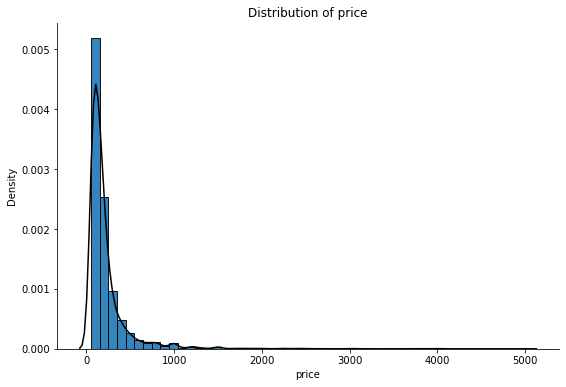

In [150]:
from statlearning import plot_dist
response='price'
fig,ax=plot_dist(train_data[response])
ax.set_title('Distribution of price')
plt.show

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


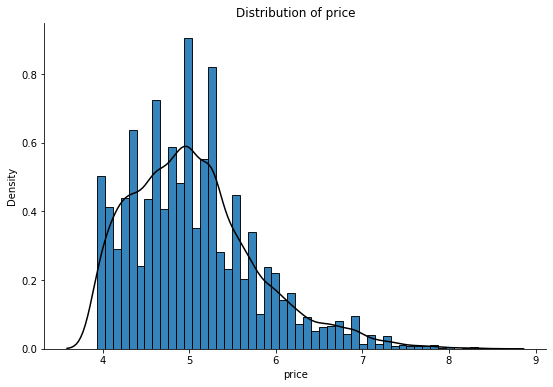

In [151]:
#log transformation on price
train_data[response]=np.log(train_data[response])
fig,ax = plot_dist(train_data[response])
ax.set_title('Distribution of price')
plt.show()

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

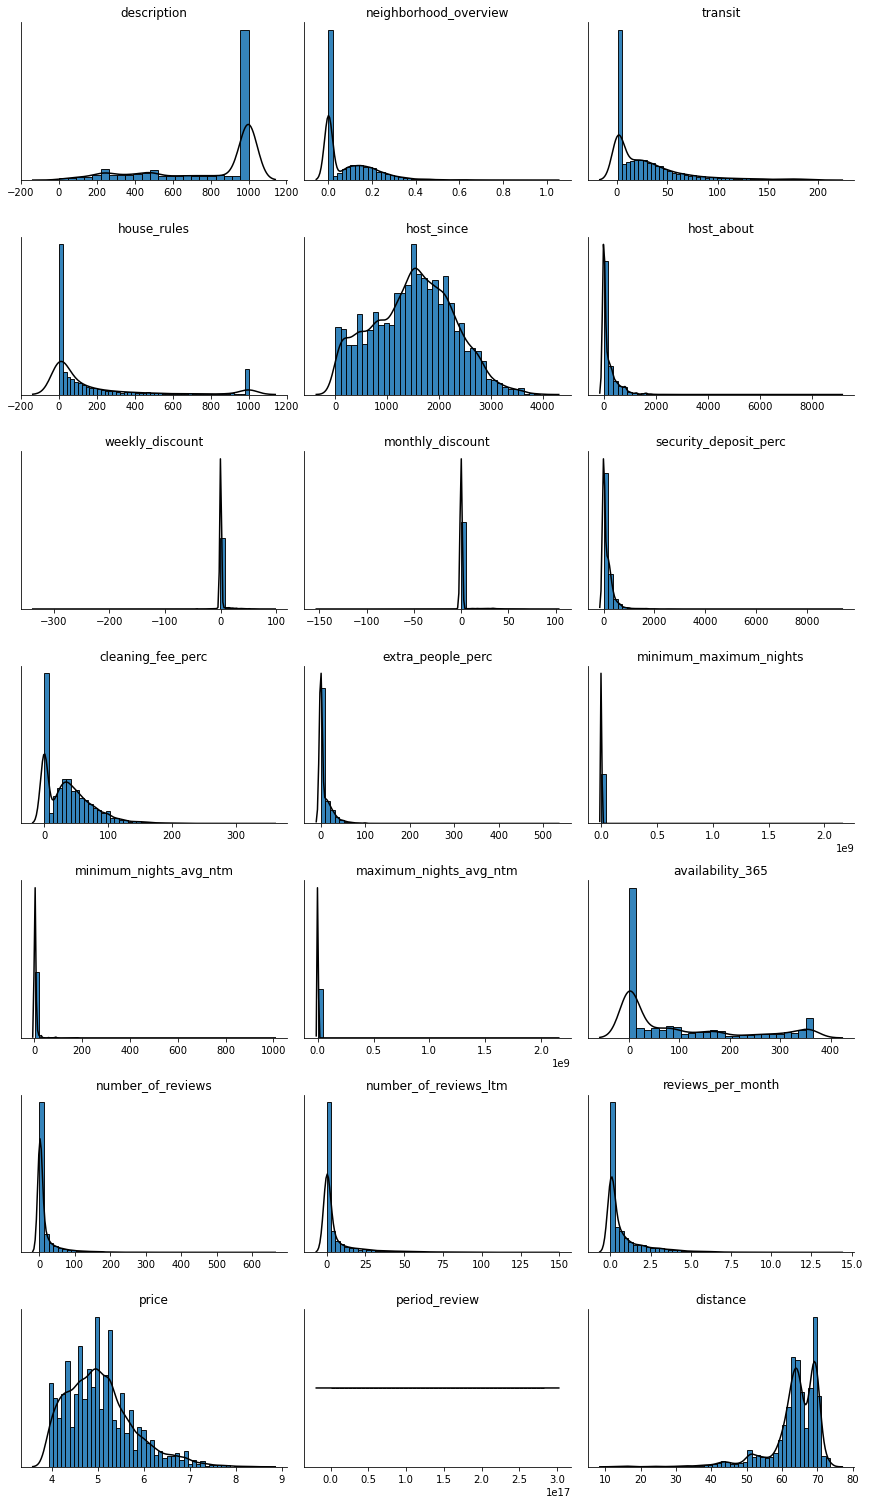

In [152]:
from statlearning import plot_dists
plot_dists(train_data[continous])
plt.show()

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alex\anaconda3\l

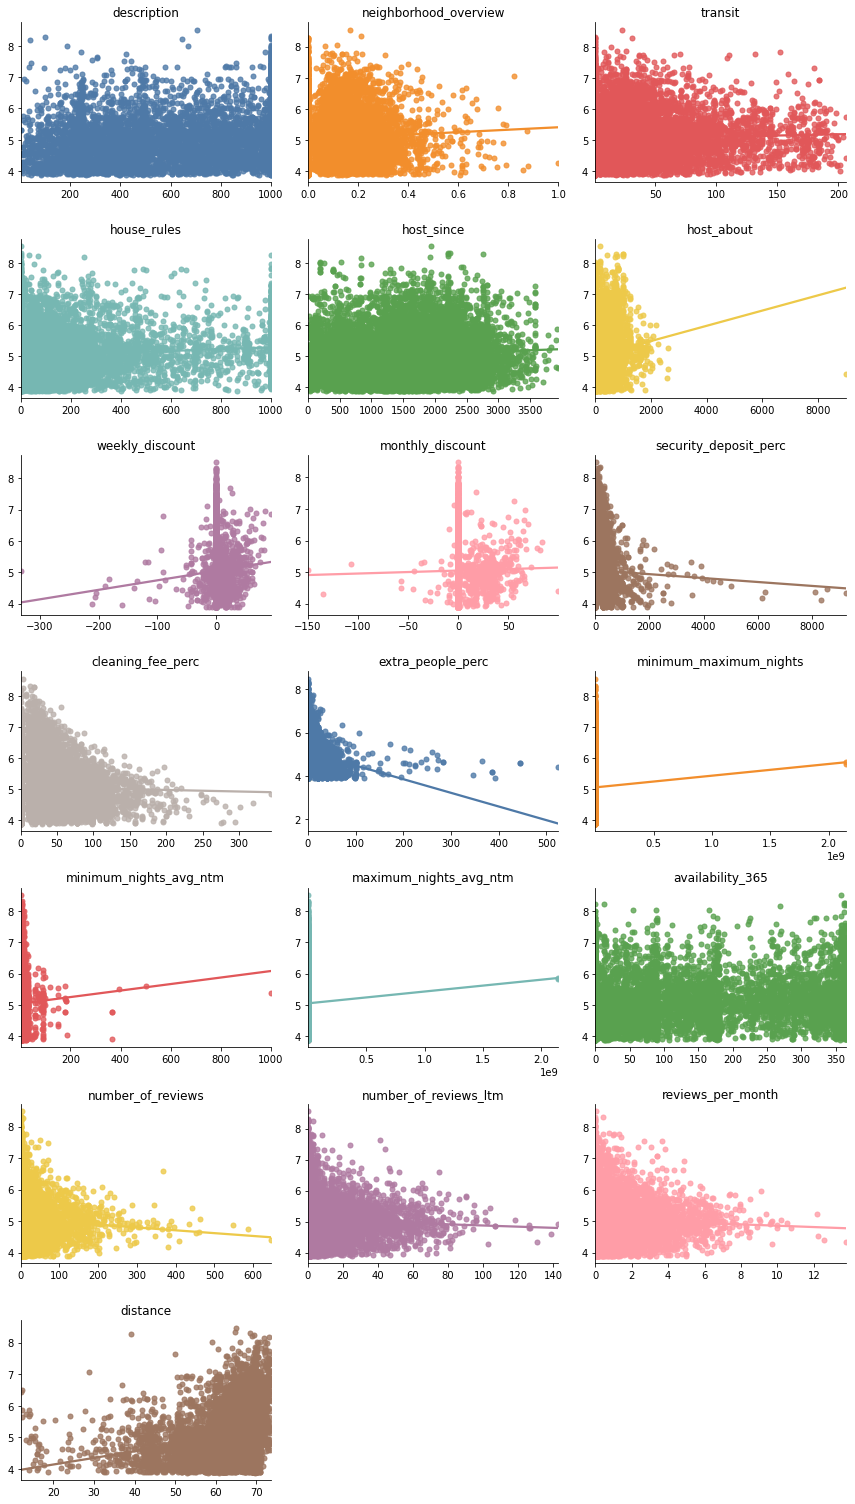

In [153]:

from statlearning import plot_regressions
reg_continous=continous.copy()
reg_continous.remove( 'period_review')
reg_continous.remove('price')
try:
    plot_regressions(train_data[reg_continous], train_data['price'])
    plt.show()
except (TypeError, NameError):
    pass

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alex\anaconda3\l

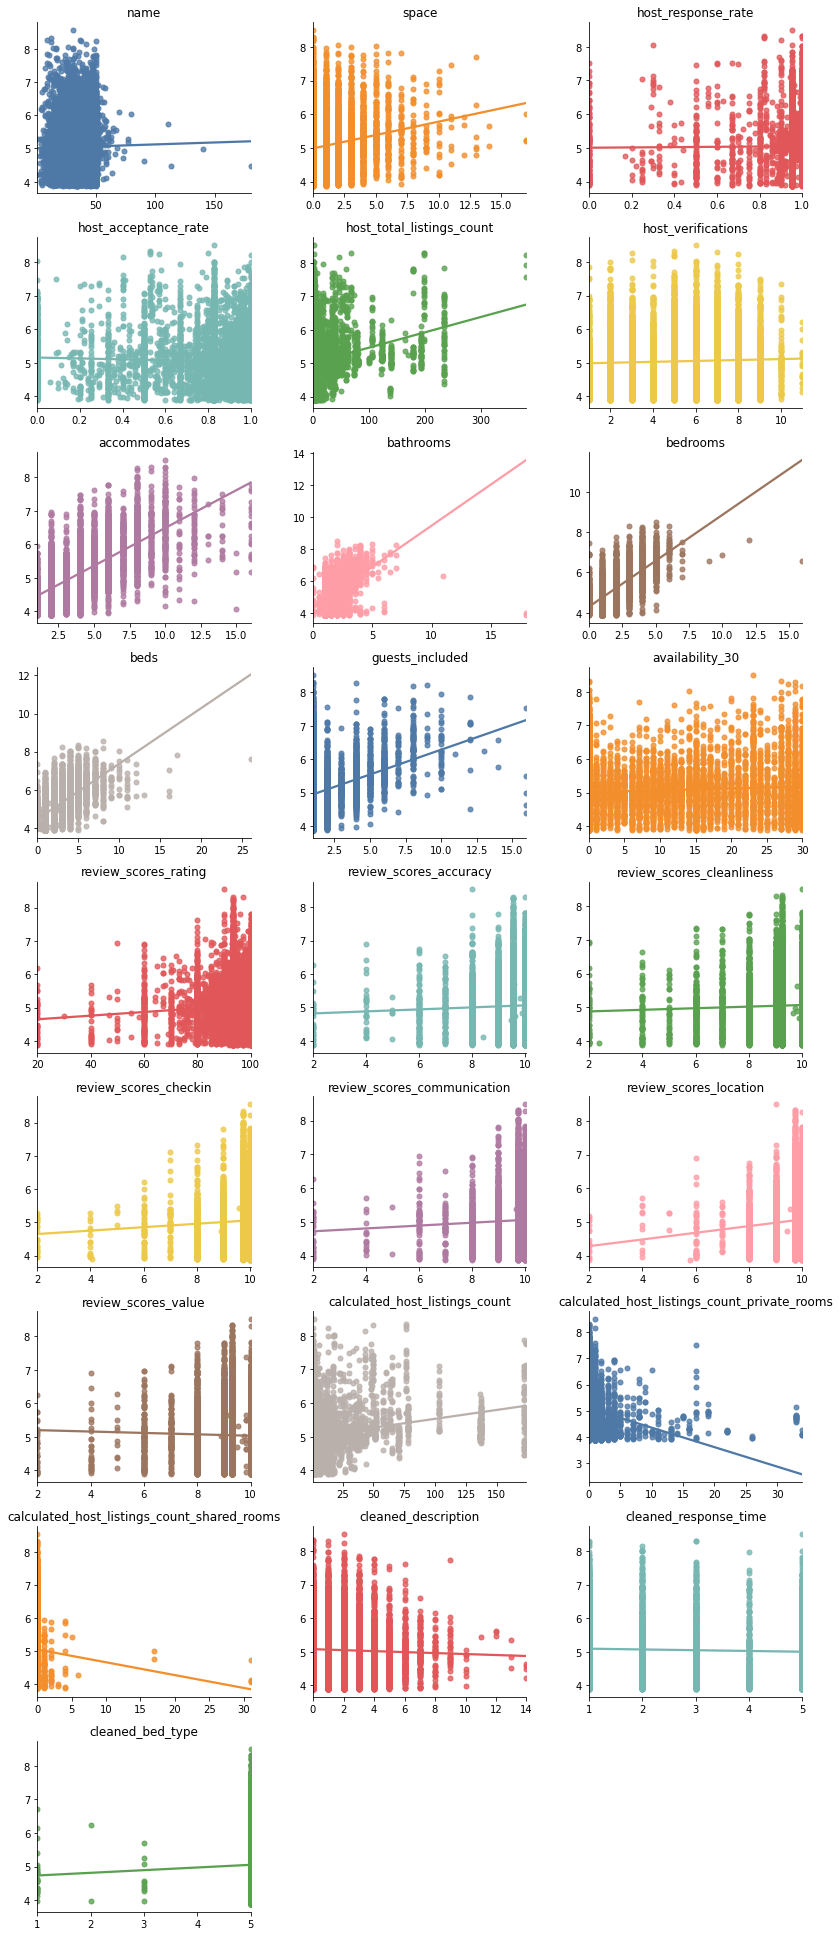

In [154]:
reg_discrete=discrete.copy()
plot_regressions(train_data[reg_discrete], train_data['price'])
plt.show()

In [155]:
#Deal with obvious outliers
print(train_data.shape)
train_data=train_data[-((train_data['bedrooms']>10)| (train_data['bathrooms']>10))]
print(train_data.shape)

(10635, 95)
(10630, 95)


In [160]:
d_c=train_data[discrete+continous]

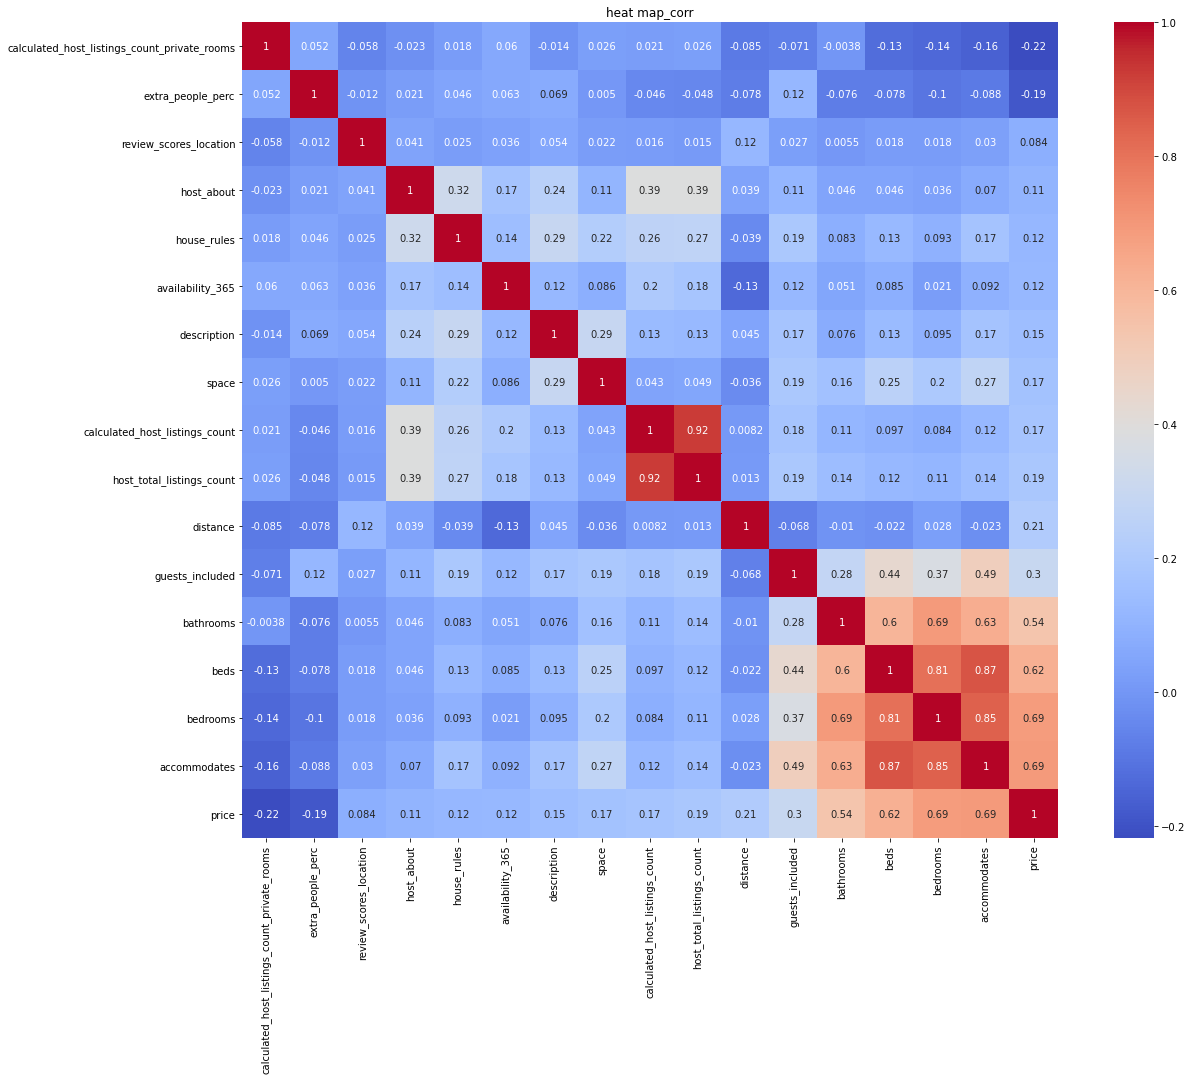

In [161]:
corrmat=d_c.corr()['price'].sort_values()
corr_train=d_c[corrmat.loc[(corrmat>0.08) | (corrmat<-0.08)].index]

plt.subplots(figsize=(20,15))

sns.heatmap(corr_train.corr(), square=True, annot=True ,cmap='coolwarm' )
plt.title('heat map_corr')
plt.show()

# Interaction

In [163]:
train_data['bathrooms_room_typeH']=train_data['bathrooms']*train_data['House']
test_data['bathrooms_room_typeH']=test_data['bathrooms']*test_data['House']

# EDA

In [172]:
#Copy of the data
df=pd.read_csv('train.csv')
copy_train=train_data.copy()
copy_train.head()

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,...,Hurstville,Inner West,Liverpool,North Shore,Southern,Waverley,Western,sydney,valley,bathrooms_room_typeH
0,45,0,1000,0.000,0,9,1,0,0.0,1531,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,45,0,363,0.000,1,17,0,0,0.0,1065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,1,1000,0.072,0,21,1,0,180.0,1711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41,1,1000,0.054,1,66,1,0,146.0,1100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48,0,782,0.465,1,49,1,1,31.0,1864,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
from statlearning import plot_dist
response = df['price'].apply(lambda x : float(x.split('$')[1].replace(',','')))


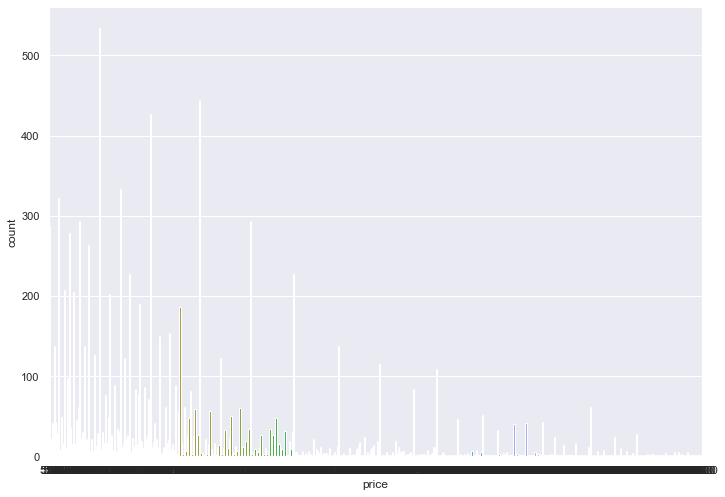

In [166]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlim([0,1500])
plt.xticks([])
sns.countplot(x=response, data=copy_train)
sns.set(style='white',palette='Paired',color_codes=True)

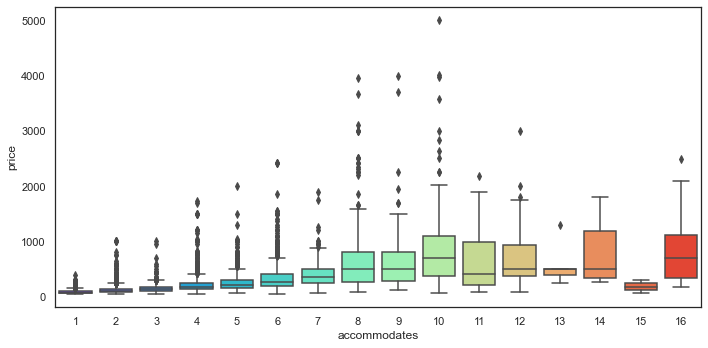

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(x='accommodates',y=response, data=df, palette='rainbow')
plt.tight_layout()
plt.show()

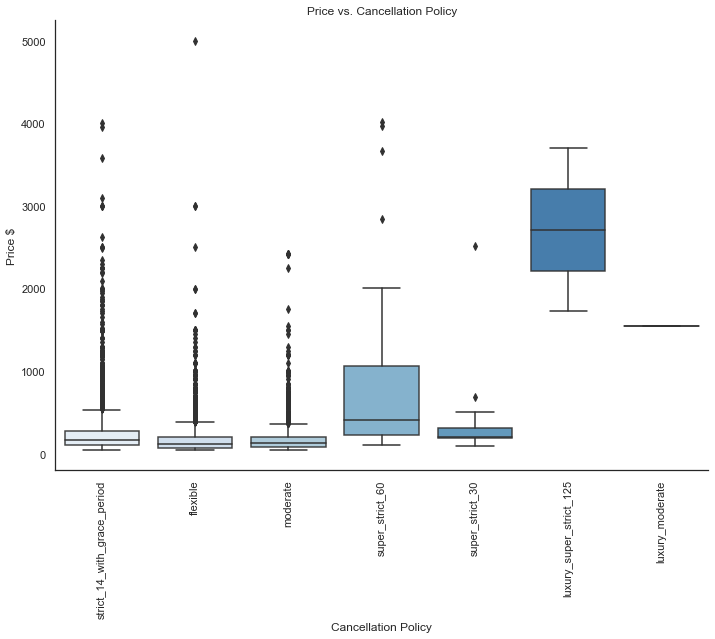

In [167]:
#raw data box plot on cancellation policy
sns.boxplot(x=df["cancellation_policy"],y=response,boxprops=dict(alpha=.9),palette="Blues")
sns.despine()
plt.title("Price vs. Cancellation Policy")
plt.xlabel("Cancellation Policy")
plt.xticks(rotation=90)
plt.ylabel("Price $")
plt.show()

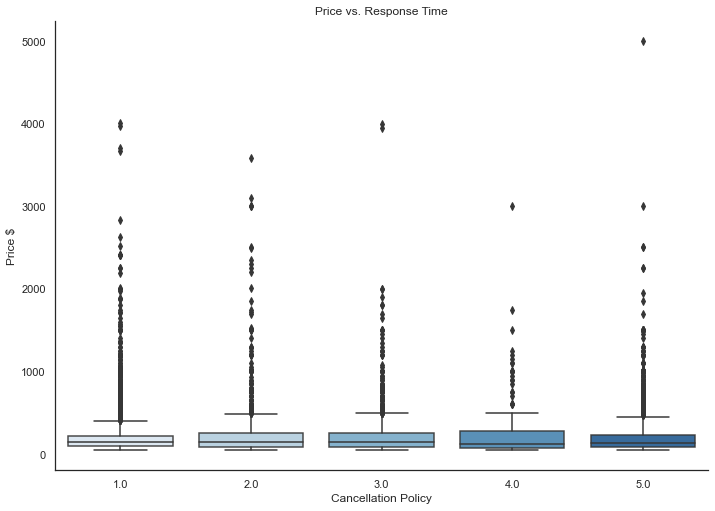

In [171]:
#canelation policy after data properssing
sns.boxplot(x=copy_train.cleaned_response_time ,y=response,boxprops=dict(alpha=.9),palette="Blues")
sns.despine()
plt.title("Price vs. Response Time")
plt.xlabel("Cancellation Policy")
plt.ylabel("Price $")
plt.show()

In [195]:
train_data.bathrooms_room_typeH  

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
10630    0.0
10631    0.0
10632    0.0
10633    0.0
10634    0.0
Name: bathrooms_room_typeH, Length: 10630, dtype: float64

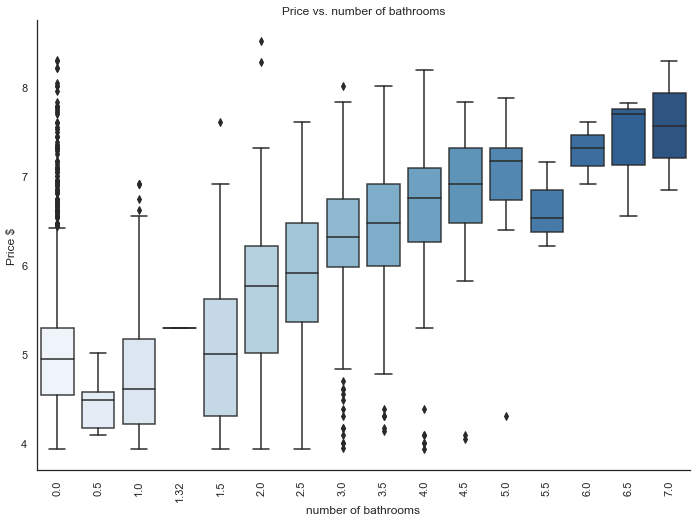

In [199]:
sns.boxplot(x=train_data['bathrooms_room_typeH'],y=train_data['price'],boxprops=dict(alpha=.9),palette="Blues" )
sns.despine()
plt.title("Price vs. number of bathrooms")
plt.xlabel("number of bathrooms")
plt.xticks(rotation=90)
plt.ylabel("Price $")
plt.show()

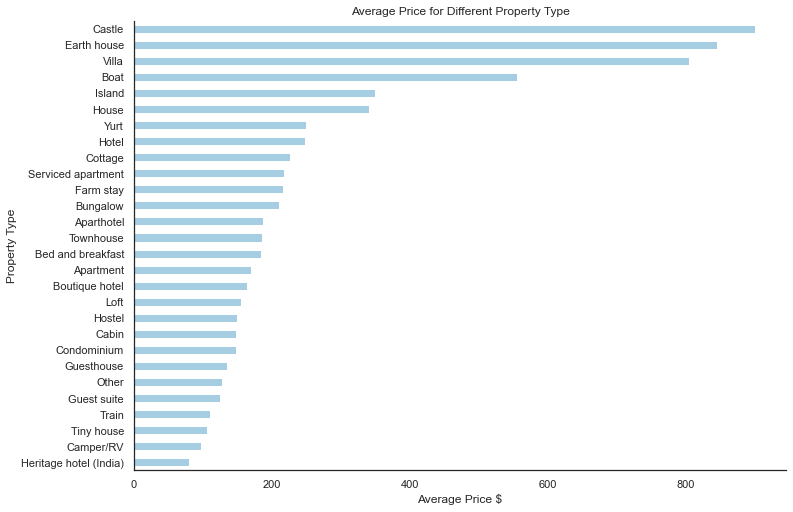

In [174]:
df["response"] = df['price'].apply(lambda x : float(x.split('$')[1].replace(',','')))
df.groupby("property_type")["response"].mean().sort_values().plot(kind='barh')
sns.despine()
plt.title("Average Price for Different Property Type")
plt.xlabel("Average Price $")
plt.ylabel("Property Type")
plt.show()

In [47]:
df['property_type'].value_counts()

Apartment                 6439
House                     2692
Townhouse                  451
Guest suite                216
Condominium                208
Guesthouse                 155
Villa                       75
Serviced apartment          63
Loft                        58
Bungalow                    51
Boutique hotel              48
Cottage                     42
Hostel                      21
Tiny house                  20
Bed and breakfast           19
Cabin                       19
Other                       14
Hotel                       14
Boat                        11
Camper/RV                    4
Aparthotel                   4
Farm stay                    3
Earth house                  2
Island                       2
Heritage hotel (India)       1
Yurt                         1
Castle                       1
Train                        1
Name: property_type, dtype: int64

In [48]:
property_type =df["property_type"].value_counts().index[:20]
df["property_type"]=df["property_type"].apply(lambda x: "Other" if x not in property_type else x)
df['property_type'].value_counts()

Apartment             6439
House                 2692
Townhouse              451
Guest suite            216
Condominium            208
Guesthouse             155
Villa                   75
Serviced apartment      63
Loft                    58
Bungalow                51
Boutique hotel          48
Cottage                 42
Other                   29
Hostel                  21
Tiny house              20
Bed and breakfast       19
Cabin                   19
Hotel                   14
Boat                    11
Camper/RV                4
Name: property_type, dtype: int64

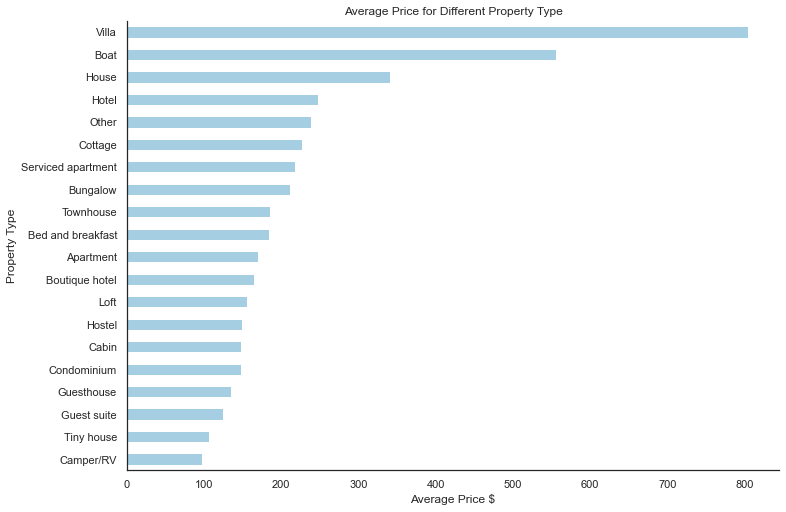

In [49]:
#Visualize the property_type against the average price
df.groupby("property_type")["response"].mean().sort_values().plot(kind='barh')
sns.despine()
plt.title("Average Price for Different Property Type")
plt.xlabel("Average Price $")
plt.ylabel("Property Type")
plt.show()

In [50]:
x1=pd.DataFrame(df['neighbourhood_cleansed'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood','neighbourhood':'count'})
print(x1)

       neighbourhood  neighbourhood_cleansed
0             Sydney                    2861
1           Waverley                    1515
2           Randwick                     886
3          Warringah                     548
4              Manly                     494
5          Woollahra                     468
6       North Sydney                     395
7          Pittwater                     360
8       Marrickville                     324
9         Leichhardt                     293
10          Rockdale                     237
11              Ryde                     188
12        Botany Bay                     184
13  Sutherland Shire                     180
14        Willoughby                     150
15            Mosman                     141
16        Parramatta                     134
17            Auburn                     132
18           Hornsby                     130
19        Canada Bay                     124
20         Lane Cove                      89
21        

In [51]:
df_sorted= df.sort_values('neighbourhood_cleansed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

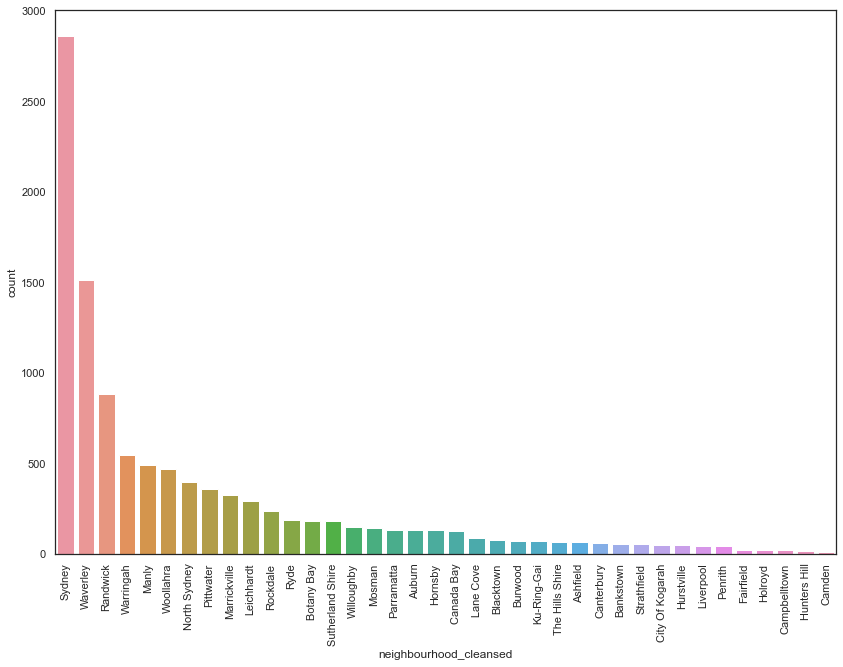

In [52]:

plt.figure(figsize=(14,10))
ax = sns.countplot(x="neighbourhood_cleansed", data=df,order = df['neighbourhood_cleansed'].value_counts().index)
plt.xticks(rotation=90)

In [53]:
neighborhood_name=df["neighbourhood_cleansed"].value_counts().index[:20]
df["neighbourhood_cleansed"]=df["neighbourhood_cleansed"].apply(lambda x: "Other" if x not in neighborhood_name else x)
df["neighbourhood_cleansed"].value_counts()

Sydney              2861
Waverley            1515
Other                891
Randwick             886
Warringah            548
Manly                494
Woollahra            468
North Sydney         395
Pittwater            360
Marrickville         324
Leichhardt           293
Rockdale             237
Ryde                 188
Botany Bay           184
Sutherland Shire     180
Willoughby           150
Mosman               141
Parramatta           134
Auburn               132
Hornsby              130
Canada Bay           124
Name: neighbourhood_cleansed, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

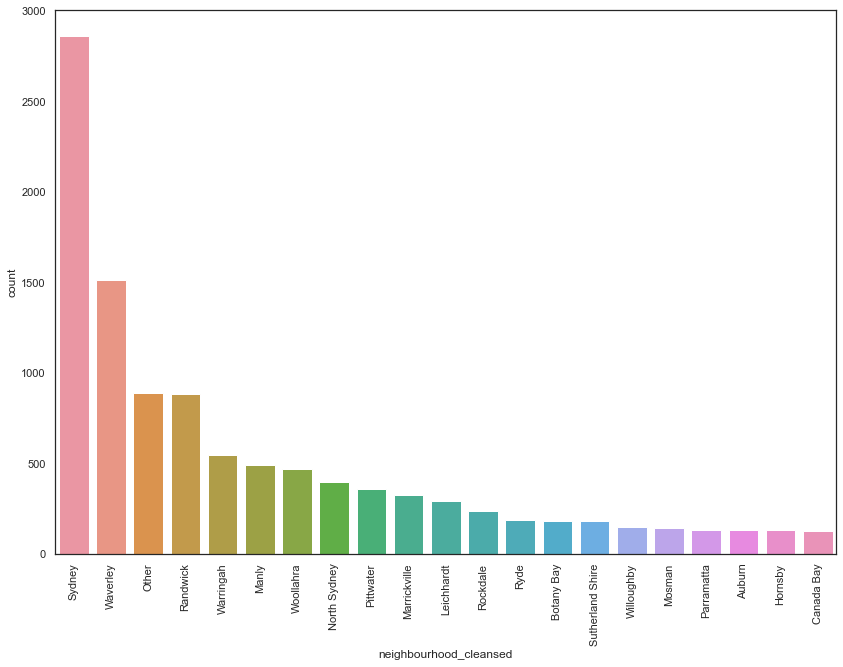

In [54]:
plt.figure(figsize=(14,10))
ax = sns.countplot(x=df["neighbourhood_cleansed"], data=df,order = df['neighbourhood_cleansed'].value_counts().index)
plt.xticks(rotation=90)

In [55]:
copy_train.loc[:,"Apartment"]

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
10630    1.0
10631    1.0
10632    1.0
10633    1.0
10634    1.0
Name: Apartment, Length: 10630, dtype: float64

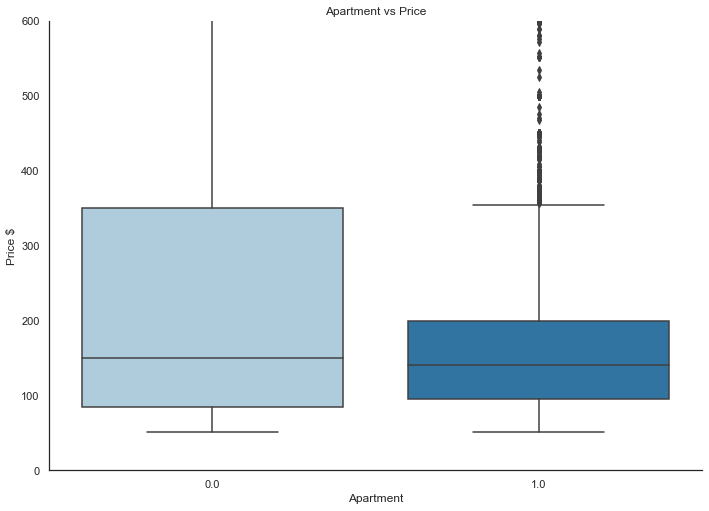

In [200]:
## box plot
import seaborn as sns
sns.boxplot(x=copy_train.loc[:,"Apartment"],y=df["response"])
plt.ylim(0,600)
plt.title("Apartment vs Price")
plt.ylabel("Price $")
sns.despine()
plt.show()
#apartment ranging $100 to $200, while the others ranging from around $100 to $400

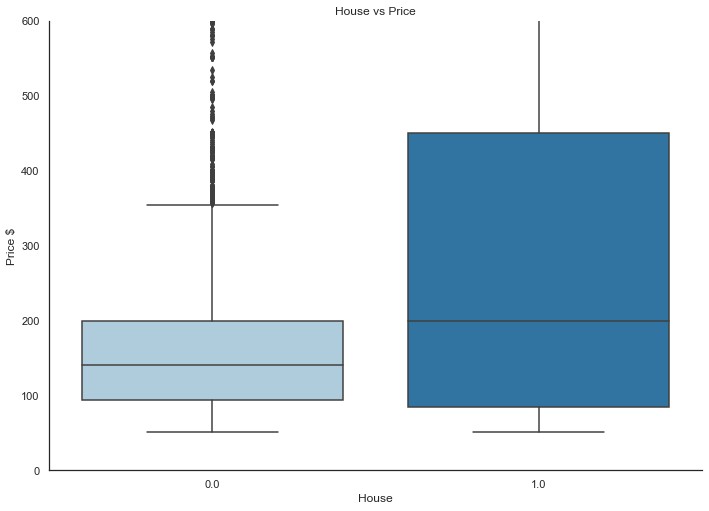

In [201]:
## box plot
import seaborn as sns
sns.boxplot(x=copy_train.loc[:,"House"],y=df["response"])
plt.ylim(0,600)
plt.title("House vs Price")
plt.ylabel("Price $")
sns.despine()
plt.show()
#House ranging $100 to $200, while the others ranging from around $100 to $400

# Interaction effects

<ipython-input-162-140fd5fc37d9>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  scatter_kws={'s':15,'alpha':0.7},palette=np.array(colours)[[(4,0)]]).ax
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


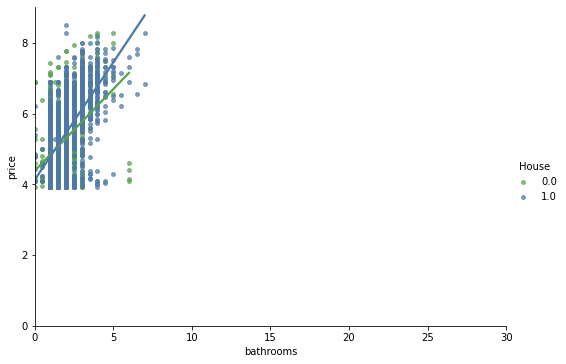

In [162]:
colours=sns.color_palette()
y,x,z='price','bathrooms','House'
ax=sns.lmplot(x,y, data=train_data,hue=z, height=5, aspect=1.4,ci=None,
             scatter_kws={'s':15,'alpha':0.7},palette=np.array(colours)[[(4,0)]]).ax
ax.set_xlim(0,30)
ax.set_ylim(0,None)
plt.show()

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The days of accomodates vs. Price -Pricate room')

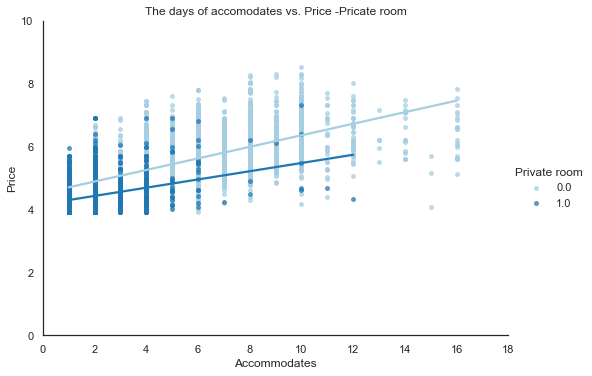

In [57]:
ax=sns.lmplot("accommodates","price",data=copy_train,hue="Private room", \
              height=5,aspect=1.4,ci=None,scatter_kws={"s":15,"alpha":0.7}).ax
plt.ylim(0,10)
plt.xlim([0,18])
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("The days of accomodates vs. Price -Pricate room")
#

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The days of accomodates vs. Price - Entire home/apt ')

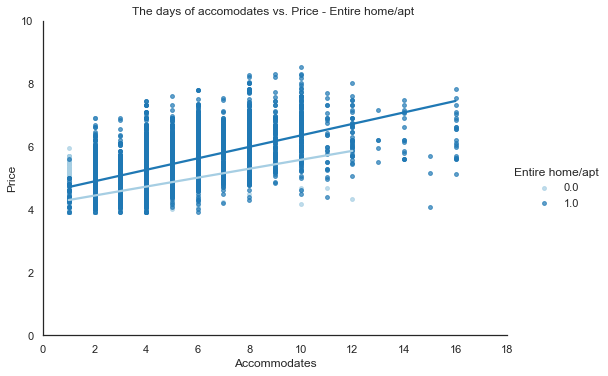

In [58]:
ax=sns.lmplot("accommodates","price",data=copy_train,hue="Entire home/apt", \
              height=5,aspect=1.4,ci=None,scatter_kws={"s":15,"alpha":0.7}).ax
plt.ylim(0,10)
plt.xlim([0,18])
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("The days of accomodates vs. Price - Entire home/apt ")

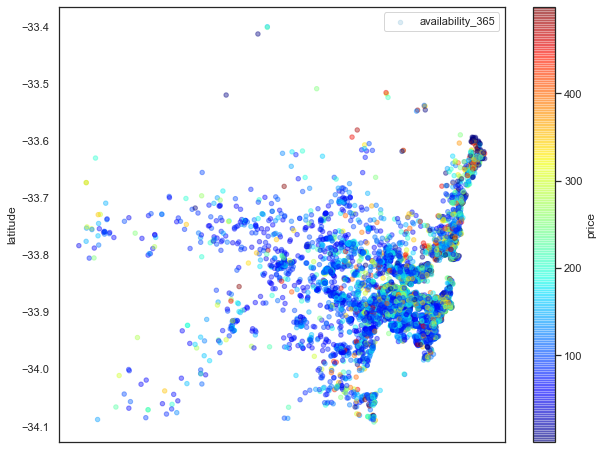

In [256]:
df.price=df.price.str.extract('(\d+)', expand=False)
df.price= df.price.astype(float)
sub_6=df[df.price<500.0]
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [ ]:
[-33.7022,150.5500]

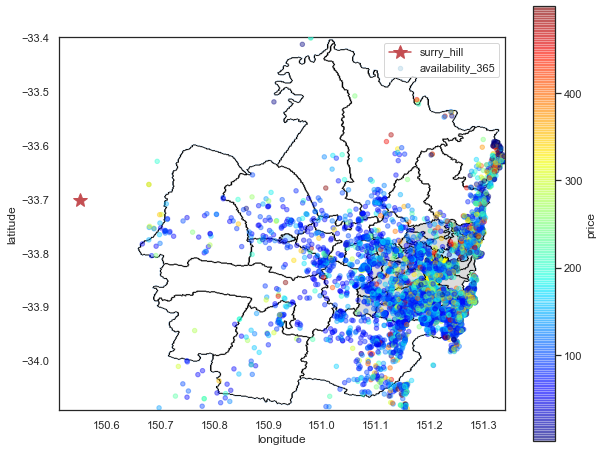

In [268]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/c/c5/Australia-Map-SYD-LGA-Sydney.png')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[ df.longitude.min(),df.longitude.max(), df.latitude.min(),df.latitude.max()])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.plot(150.5500,-33.7022,c='r',marker="*",ms=14,label="surry_hill")
plt.legend()
plt.show()

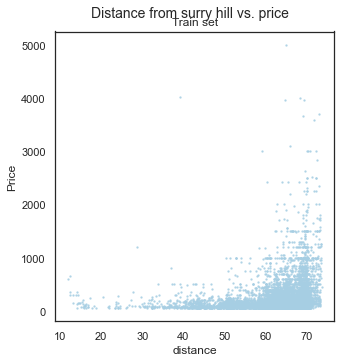

In [269]:
fig, ( ax2) = plt.subplots(1, figsize=(5, 5))
fig.suptitle('Distance from surry hill vs. price', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)


    
ax2.scatter(train_data.distance,np.exp(train_data.price), s=2, alpha=0.7)

ax2.set_title('Train set')
ax2.set_xlabel('distance')

ax2.set_ylabel('Price')

    
plt.show()

# Data transformation

In [177]:
dt_train_data=train_data.drop(['price'],axis=1)
dt_train_data.head()

,name,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,...,Hurstville,Inner West,Liverpool,North Shore,Southern,Waverley,Western,sydney,valley,bathrooms_room_typeH
0,45,0,1000,0.000,0,9,1,0,0.0,1531,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,45,0,363,0.000,1,17,0,0,0.0,1065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,1,1000,0.072,0,21,1,0,180.0,1711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41,1,1000,0.054,1,66,1,0,146.0,1100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48,0,782,0.465,1,49,1,1,31.0,1864,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
y_train_data=train_data.price
dt_test_data=test_data

# Make sure all values are positive before doing log transformation

In [179]:
dt_train_data['weekly_discount']=dt_train_data['weekly_discount'].apply(lambda x: 0 if x<0 else x)
dt_train_data['monthly_discount']=dt_train_data['monthly_discount'].apply(lambda x: 0 if x<0 else x)

In [180]:
dt_test_data['weekly_discount']=dt_test_data['weekly_discount'].apply(lambda x: 0 if x<0 else x)
dt_test_data['monthly_discount']=dt_test_data['monthly_discount'].apply(lambda x: 0 if x<0 else x)

# Vararibes classifcation

In [181]:
continous_n=[]
discrete_n=[]
dummy_n=[]

for i in dt_train_data.columns:
    if dt_train_data[i].value_counts().shape[0] > 25:
        continous_n.append(i)
    elif dt_train_data[i].value_counts().shape[0]==2:
        dummy_n.append(i)
    else:
        discrete_n.append(i)
print('continous variable', continous_n)
print(' ')
print('dummy variable', dummy_n)
print(' ')
print('discrete', discrete_n)

continous variable ['name', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'host_since', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'weekly_discount', 'monthly_discount', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'calculated_host_listings_count', 'reviews_per_month', 'period_review', 'distance']
 
dummy variable ['notes', 'access', 'interaction', 'has_Dog(s)', 'has_Pets_live_on_this_property', 'has_Cat(s)', 'has_Iron', 'has_Heating', 'has_Other_pet(s)', 'has_Essentials', 'has_Cable_TV', 'has_Doorman', 'has_TV', 'has_Shampoo', 'has_Internet', 'has_Dryer', 'has_Kitchen', 'has_Hangers', 'has_Gym', 'has_Washer', 'has_Pool', 'has_Breakfast', 'cleaned_host_is_superhost', 'cleaned_host_identity_verified', 'cleaned_is_loc

In [182]:
for i in discrete_n:
    dt_train_data[i]=dt_train_data[i].astype('uint8')

In [183]:
for i in discrete_n:
    dt_test_data[i]=dt_test_data[i].astype('uint8')

In [184]:
dt_train_data['period_review']=dt_train_data['period_review'].apply(lambda x: float(x.days))
dt_test_data['period_review']=dt_test_data['period_review'].apply(lambda x: float(x.days))

In [185]:
dt_train_data[discrete_n+continous_n]=np.log1p(dt_train_data[discrete_n+continous_n])
dt_test_data[discrete_n+continous_n]=np.log1p(dt_test_data[discrete_n+continous_n])

In [186]:
dt_test_data.drop('id',axis=1,inplace=True)

In [188]:
x_train_logscal=dt_train_data.copy()
for i in continous_n+discrete_n:
    x_train_logscal[i]=(dt_train_data[i]-dt_train_data[i].min())/(dt_train_data[i].max()-dt_train_data[i].min())

In [189]:
x_test_logscal=dt_test_data.copy()
for i in continous_n+discrete_n:
    x_test_logscal[i]=(dt_test_data[i]-dt_test_data[i].min())/(dt_test_data[i].max()-dt_test_data[i].min())

In [190]:
x_train_logscal.shape,x_test_logscal.shape


((10630, 95), (24818, 95))

# Model Estimation

# Liner Regression

In [202]:
from sklearn.linear_model import LinearRegression
Ols=LinearRegression(fit_intercept=True)
Ols.fit(x_train_logscal,y_train_data)

LinearRegression()

In [203]:
from sklearn.linear_model import RidgeCV
%time
alphas=list(np.logspace(-15,15,151,base=2))
ridge=RidgeCV(alphas=alphas)
ridge.fit(x_train_logscal,y_train_data)

Wall time: 0 ns


RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       8.91443777e+02, 1.02400000e+03, 1.17626712e+03, 1.35117610e+03,
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]))

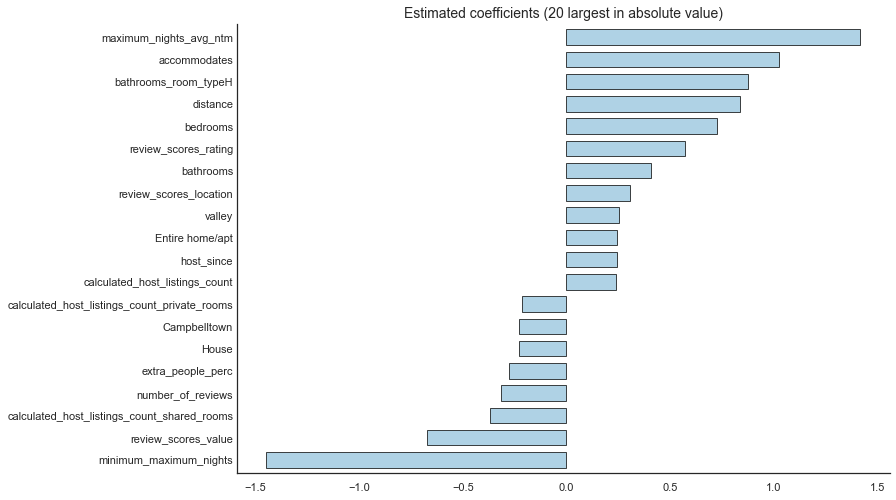

In [204]:
from statlearning import plot_coefficients
plot_coefficients(ridge,x_train_logscal.columns)
plt.show()

In [205]:
from sklearn.linear_model import LassoCV
%time
lasso=LassoCV(cv=5)
lasso.fit(x_train_logscal,y_train_data)
np.sum(lasso.coef_==0.0)

Wall time: 0 ns


10

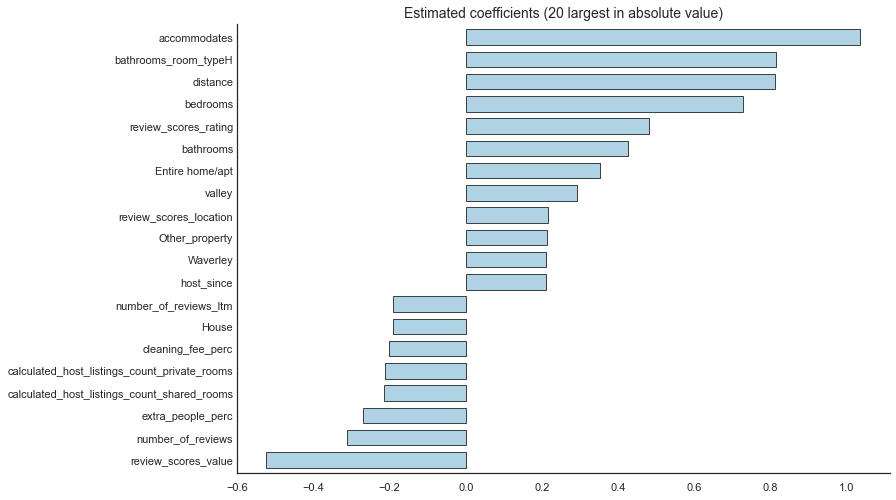

In [206]:
plot_coefficients(lasso,x_train_logscal.columns)
plt.show()

In [207]:
from sklearn.linear_model import ElasticNetCV
enet=ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99], cv=5)
enet.fit(x_train_logscal,y_train_data)
print(enet.l1_ratio_,
np.sum(enet.coef_==0.0))

0.99 10


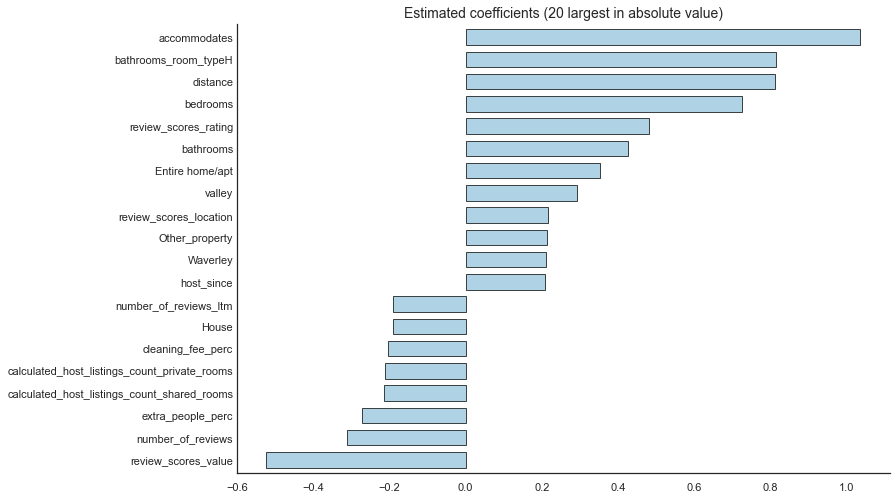

In [208]:
plot_coefficients(enet,dt_train_data.columns)
plt.show()

# Tree models

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [210]:
model=DecisionTreeRegressor(min_samples_leaf=5)

tuning_parameters={
    'min_samples_leaf':[1,5,10,20],
    'max_depth':np.arange(1,30),
}
tree=RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=5, return_train_score=False)
tree.fit(x_train_logscal,y_train_data)

print('Best parameter:', tree.best_params_)

Best parameter: {'min_samples_leaf': 20, 'max_depth': 9}


In [211]:
from sklearn.tree import export_graphviz
model_plot=DecisionTreeRegressor(max_depth=3,min_samples_leaf=150)
tuning_parameters={
    'min_samples_leaf':[150],
    'max_depth':[1,2,3],
    
}
tree_plot=RandomizedSearchCV(model_plot,tuning_parameters, n_iter=20, cv=5,return_train_score=False  )
tree_plot.fit(x_train_logscal,y_train_data)
best_estimatpr_plot=tree_plot.best_estimator_
dot_data=export_graphviz(best_estimatpr_plot)
print(dot_data)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


digraph Tree {
node [shape=box] ;
0 [label="X[17] <= 0.374\nmse = 0.536\nsamples = 10630\nvalue = 5.049"] ;
1 [label="X[80] <= 0.5\nmse = 0.224\nsamples = 6116\nvalue = 4.665"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[65] <= 0.898\nmse = 0.164\nsamples = 3123\nvalue = 4.916"] ;
1 -> 2 ;
3 [label="mse = 0.123\nsamples = 533\nvalue = 4.659"] ;
2 -> 3 ;
4 [label="mse = 0.155\nsamples = 2590\nvalue = 4.969"] ;
2 -> 4 ;
5 [label="X[28] <= 0.919\nmse = 0.154\nsamples = 2993\nvalue = 4.404"] ;
1 -> 5 ;
6 [label="mse = 0.129\nsamples = 2406\nvalue = 4.366"] ;
5 -> 6 ;
7 [label="mse = 0.225\nsamples = 587\nvalue = 4.559"] ;
5 -> 7 ;
8 [label="X[17] <= 0.518\nmse = 0.489\nsamples = 4514\nvalue = 5.569"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[65] <= 0.898\nmse = 0.234\nsamples = 2692\nvalue = 5.263"] ;
8 -> 9 ;
10 [label="mse = 0.185\nsamples = 595\nvalue = 4.997"] ;
9 -> 10 ;
11 [label="mse = 0.223\nsamples = 2097\nvalue =

# Bagging Regressor

In [212]:
from sklearn.ensemble import BaggingRegressor

In [213]:
bag_model=BaggingRegressor(n_estimators=1000, random_state=1)
bag_model.fit(x_train_logscal,y_train_data)

BaggingRegressor(n_estimators=1000, random_state=1)

# Random Forest

In [214]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
model= RandomForestRegressor(n_estimators=100)

tuning_parameters={
    'min_samples_leaf':[1,5,10,20,50],
    'max_features': np.arange(1,x_train_logscal.shape[1],5 ),
}
rf_search=RandomizedSearchCV(model, tuning_parameters, cv=5, n_iter=16, return_train_score=False, n_jobs=4, random_state=20)
rf_search.fit(x_train_logscal,y_train_data)

print('Best parameter:', rf_search.best_params_)

Best parameter: {'min_samples_leaf': 1, 'max_features': 71}


In [216]:
rf= RandomForestRegressor(n_estimators=100,min_samples_leaf=1, max_features= 36)

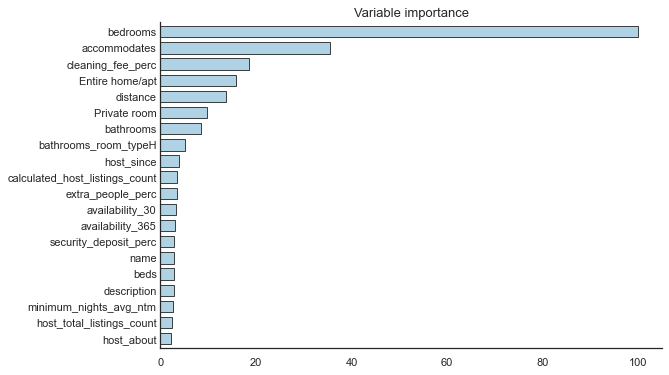

In [217]:
from statlearning import plot_feature_importance

plot_feature_importance(rf_search.best_estimator_, dt_train_data.columns)
plt.show()

# GDBoost

In [218]:
from sklearn.ensemble import GradientBoostingRegressor

In [219]:
gb=GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=750, subsample=1.0)
gb.fit(x_train_logscal,y_train_data)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=750)

In [220]:
model= GradientBoostingRegressor()

tuning_parameters={
   'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[250,500,750,1000,1500],
    'max_depth':[2,3,4],
    'subsample':[0.6,0.8,1.0]
}
gb=RandomizedSearchCV(model, tuning_parameters, cv=10, n_iter=1, return_train_score=False, n_jobs=4)
gb.fit(x_train_logscal,y_train_data)

print('Best parameter:', gb.best_params_)

Best parameter: {'subsample': 1.0, 'n_estimators': 750, 'max_depth': 4, 'learning_rate': 0.01}


In [221]:
gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=750)

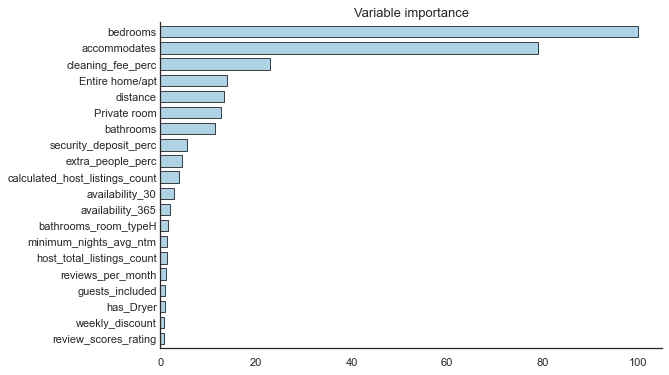

In [222]:
plot_feature_importance(gb.best_estimator_, dt_train_data.columns)
plt.show()

# Model stcaking

In [223]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import export_graphviz

In [224]:
models=[rf,lasso,ridge,gb]
stack=StackingCVRegressor(models, meta_regressor=LinearRegression(), cv=10)
stack.fit(x_train_logscal,y_train_data.ravel())

StackingCVRegressor(cv=10, meta_regressor=LinearRegression(),
                    regressors=[RandomForestRegressor(max_features=36),
                                LassoCV(cv=5),
                                RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.850239...
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04])),
                                RandomizedSearchCV(cv=10,
                                                   estimator=GradientBoostingRegressor(),
                                                   n_iter=1, n_jobs=4,
                                                   param_distributions={'learning_rate': [0.01,
         

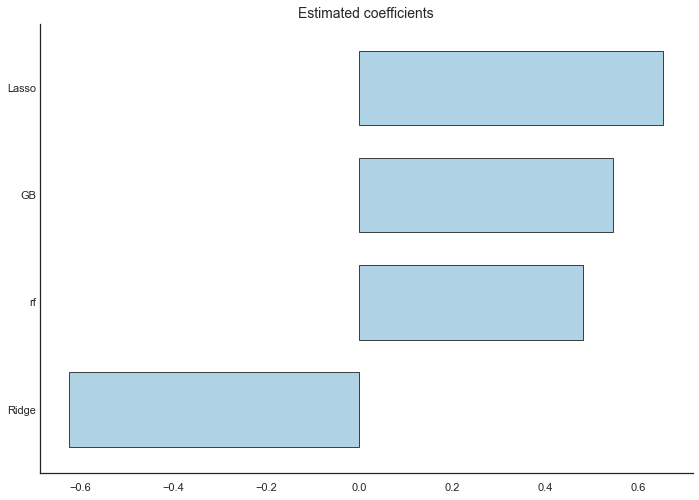

In [225]:
from statlearning import plot_coefficients
plot_coefficients(stack.meta_regr_, labels=['rf','Ridge','Lasso','GB'])
plt.show()

In [226]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [227]:
rf=rf_search

# Initialise table
columns=['Test RMSE', 'Test R-Squared']
rows=['Ols', 'Lasso', 'Ridge','enet','rf','Bagging','GB','Stack']
results = pd.DataFrame(0.0, columns=columns, index=rows)

methods=[Ols, lasso, ridge, enet, rf, bag_model, gb, stack]

# Fill table with the results
for i,methods in enumerate (methods):
    if methods!=stack:
        y_pred_training=np.exp(methods.predict(x_train_logscal))
    else:
         y_pred_training=np.exp(methods.predict(x_train_logscal))
    results.iloc[i,0]=np.sqrt(mean_squared_error(np.exp(y_train_data), y_pred_training))
    results.iloc[i,1]=r2_score(np.exp(y_train_data), y_pred_training)

results.round(3)

,Test RMSE,Test R-Squared
Ols,182.973,0.537
Lasso,184.322,0.530
Ridge,183.060,0.536
enet,184.326,0.530
rf,72.542,0.927
Bagging,70.922,0.930
GB,125.410,0.782
Stack,71.960,0.928


In [228]:
##Output submission file
y_pre_testing=stack.predict(x_test_logscal)
submission=pd.DataFrame(np.c_[dt_test_data.index,np.exp(y_pre_testing)], columns=['Id', 'price'])
submission['Id']=submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv', index=False)

y_pred=np.exp(y_pre_testing)

In [229]:
print(y_pred)

[180.26693675 361.69621641 165.60823079 ... 155.65647667  81.78744368
  86.80307249]


# Result plot 

In [235]:
y_y=bag_model.predict(x_train_logscal)

In [238]:
y_y=np.exp(y_y)

In [240]:
y_t=np.exp(train_data.price)

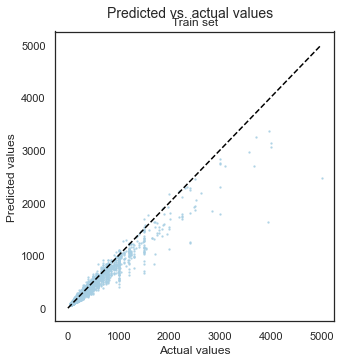

In [242]:
fig, ( ax2) = plt.subplots(1, figsize=(5, 5))
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)


    
ax2.scatter(y_t,y_y, s=2, alpha=0.7)
ax2.plot(list(range(0,5000)), list(range(0,5000)), color='black', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')

ax2.set_ylabel('Predicted values')

    
plt.show()

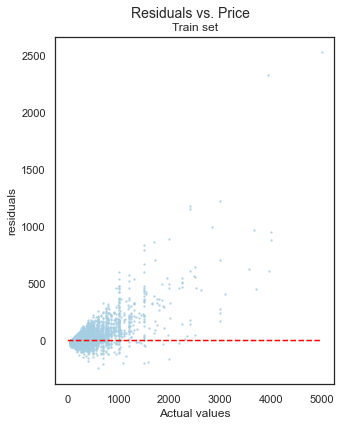

In [244]:
x=np.zeros(5000)
fig, (ax1) = plt.subplots( figsize=(5, 6))
fig.suptitle('Residuals vs. Price', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)

ax1.scatter(y_t, y_t-y_y, s=2, alpha=0.7)
ax1.plot(list(range(0,5000)), x, color='red', linestyle='--')



ax1.set_title('Train set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('residuals')
plt.show()